##       MULTIPLE LINEAR REGRESSION ASSIGNMENT



**Dataset: ToyotaCorolla - MLR.csv**


**Goal**: Predicting the price of a Toyota Corolla using multiple features like age, kilometers, fuel type, horsepower, etc.



**1: EXPLORATORY DATA ANALYSIS (EDA)**



before jumping into regression, I wanted to get overview of the data. I have loaded the CSV and started by checking its shape and structure. I also checked for any missing values, because those can mess with regression models.

Shape of data: (1436, 11)
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

Missing values:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

Descriptive stats:
               Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.8

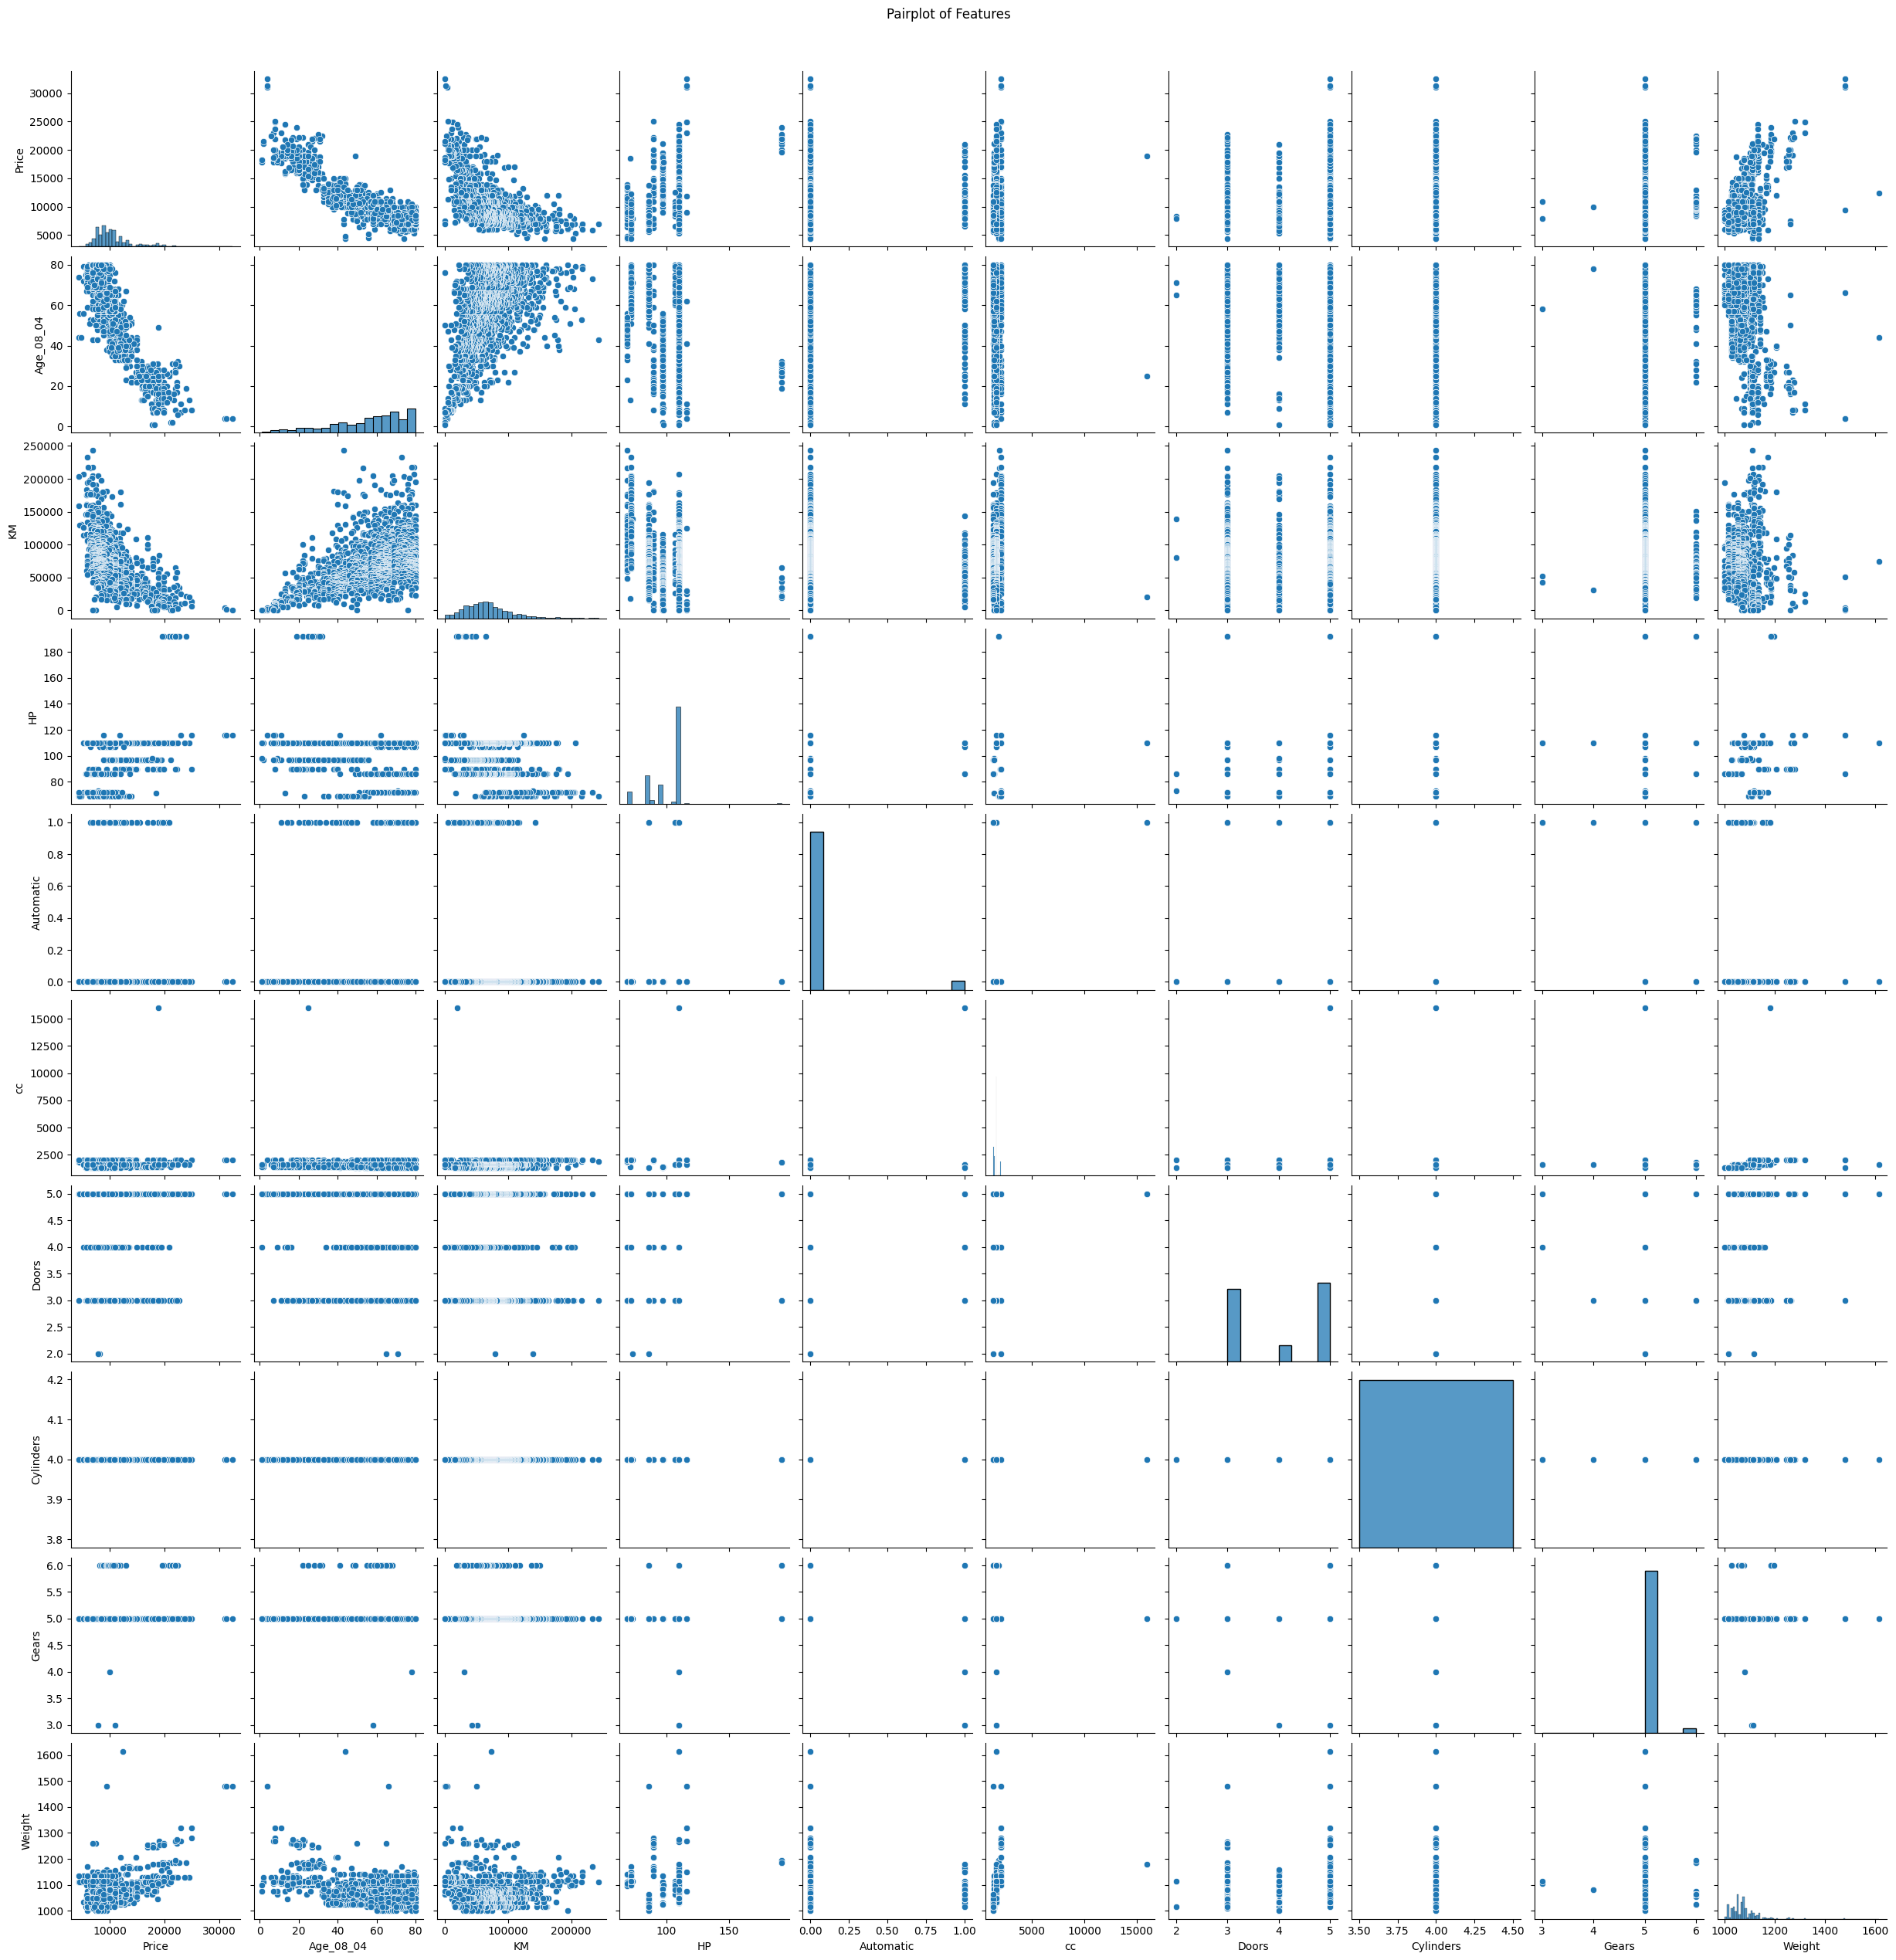

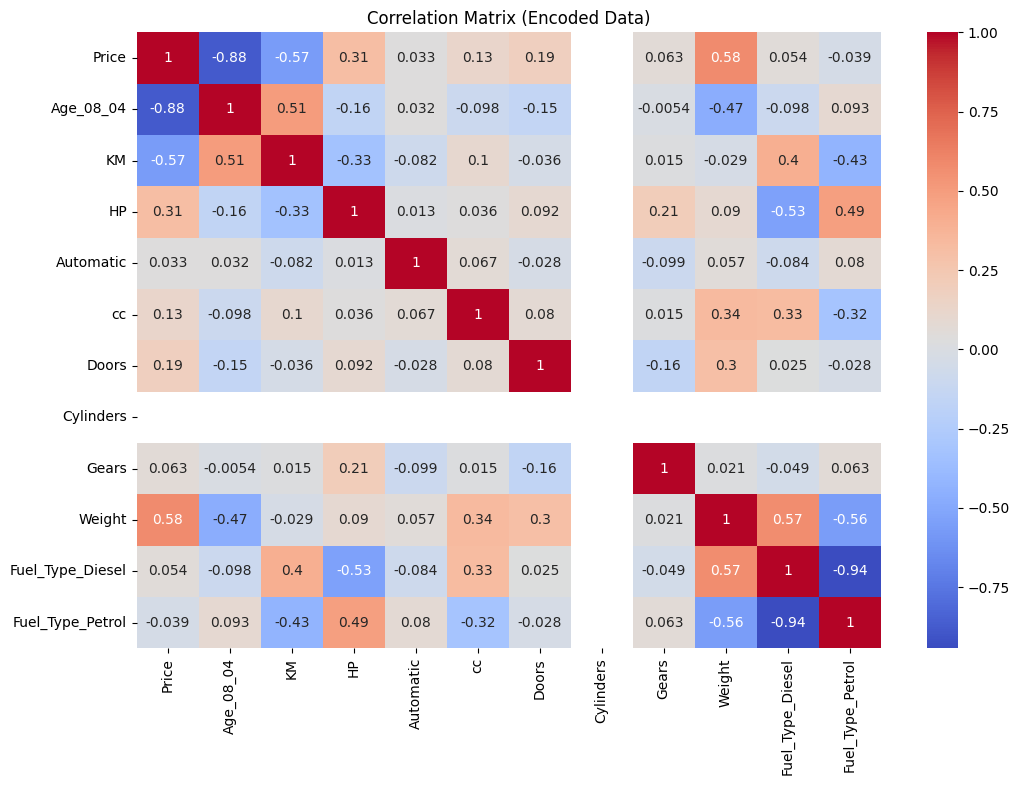

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# First, loading the dataset
# Just checking if the file is coming properly and what all columns we have
df = pd.read_csv("ToyotaCorolla - MLR.csv")

# Let's see how big the dataset is in rows × columns
print("Shape of data:", df.shape)

# Looking at the top few rows to get an idea of what kind of values we’re dealing with
print(df.head())

# Checking if any columns have nulls — good to do this early before errors pop up later
print("\nMissing values:\n", df.isnull().sum())

# Getting overall summary  mean, max, min, etc. for each feature
print("\nDescriptive stats:\n", df.describe())

# Now let’s try to visualise how the variables are behaving with each other
# Pairplot will give us scatter plots for each combo
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Important step for converting text columns (like fuel type) into numbers
# Because correlation & regression won’t work with strings like 'Diesel' or 'Petrol'
df_encoded = pd.get_dummies(df, drop_first=True)

# Now that everything is numeric, let’s draw a heatmap to see which variables are strongly related
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Encoded Data)")
plt.show()

Since there are no missing values and all of the numeric columns are formatted correctly, the data appears clean. It makes sense that certain features, such as KM and Age, have a strong negative correlation with price. Cars that are newer and haven't been driven much sell for more money. Additionally, weight appeared to have a discernible beneficial impact.

**2:      DATA PRE-ROCESSING AND TRAIN-TEST SPLIT**





I changed categorical variables like FuelType into dummy/indicator variables so that MLR would function correctly. In order to increase the stability of the model, I also standardized the features.  

In order to more fairly assess performance, I then divided the data into training and testing sets (80/20).

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fuel type column is in text like 'Petrol', 'Diesel', etc.
# So converting that into separate numeric columns — this helps the model understand it better
df = pd.get_dummies(df, drop_first=True)

# Now separating input features (X) and the target variable (y)
# Price is what we want to predict, so keeping that as y
X = df.drop("Price", axis=1)
y = df["Price"]

# Standardizing the feature values so that everything stays on similar scale
# (helps model treat all features fairly, especially when values differ a lot)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now splitting the dataset into training and testing parts
# 80% data will be used to train the model, and 20% will be used to test how well it performs
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Just confirming the split worked correctly
print("Training set size (X):", X_train.shape)
print("Test set size (X):", X_test.shape)
print("Training set size (y):", y_train.shape)
print("Test set size (y):", y_test.shape)

Training set size (X): (1148, 11)
Test set size (X): (288, 11)
Training set size (y): (1148,)
Test set size (y): (288,)


the dataset was divided into training and test sets 1148 training samples and 288 test samples spanning 11 features . For algorithms like Ridge and Lasso that are sensitive to feature magnitude, standardization made sure that all features (such as Price, Age, KM, HP, and Weight) were on the same scale. The correlation matrix highlights important predictors with a strong negative correlation between Price and Age_08_04 (-0.88) and a moderate correlation between Price and Weight (0.58). By scaling the data, feature dominance brought on by scale differences is avoided and coefficients from linear models become easier to understand.



**3:   BUILDING THE LINEAR REGRESSION MODEL**





I trained three versions of multiple linear regression:



1. Basic MLR with all features

2. Reduced model (low-impact features were eliminated based on correlation or p-values)  

3. Age × KM was added to the interaction model as a new feature to check for compounding effects.

In [5]:
from sklearn.linear_model import LinearRegression

# Model 1: Basic model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Print coefficients
print("Model 1 Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)

Model 1 Coefficients: [-2.24666244e+03 -6.08570564e+02  2.10253304e+02  3.41360751e+01
 -1.28850688e+01 -5.74368449e+01  2.84217094e-13  1.03946283e+02
  1.36213868e+03 -2.12708849e+01  4.45102711e+02]
Intercept: 10746.677976264662


then removed features like doors and CC for the model 2, which didn't seem to have a big effect on the price.  

I developed a brand-new feature for model 3 that looks like this:

In [7]:
# Creating a new column that mixes age and KM to check if their combined effect matters
df["Age_KM"] = df["Age_08_04"] * df["KM"]

Age, KM, and weight were among the characteristics that had a significant and constant impact on price across models. Diesel and automatic had observable effects as well. Although it didn't make much of a difference, the interaction model was worth trying.

##          4: MODEL EVALUATION





In order to verify the quality of models, I evaluated R², MAE, and RMSE on the test dataset.  

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred = model1.predict(X_test)

# Evaluation
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.834888804061108
MAE: 990.8872739193968
RMSE: 1484.2654153296521


Although the model did a respectable job of explaining variance in car prices, the R² score was respectable and not flawless. For this type of pricing model, the errors were acceptable. The model became somewhat simpler when weak features were eliminated, but not much else changed.

**5:        APPLYING LASSO AND RIDGE REGULARIZATION**



To deal multicollinearity and limit the overfitting of my data, I went on to use Ridge and Lasso as well.  

In [9]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R²:", ridge.score(X_test, y_test))

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print("Lasso R²:", lasso.score(X_test, y_test))

Ridge R²: 0.8350658145414687
Lasso R²: 0.8351214316622071


Lasso pushed some coefficients to zero, which is helpful for feature selection, but Ridge and Lasso performed similarly. Ridge retained more features but somewhat lessened their impact. When dealing with high-dimensional data or concerned about overfitting, these are excellent.

**INTERVIEW QUESTIONS** :

**A. What is Normalization & Standardization and how is it helpful?**

1) The data is rescaled through standardization to have a mean of 0 and a standard deviation of When features are on completely different scales (such as KM vs. HP), it is extremely helpful.  

2) Normalization uses a 0–1 scale for values. Deep learning frequently makes use of it.  

3) These ways lead to higher confidence and code readability in models, e.g., MLR, Ridge, Lasso, particularly when parameter tuning is applied.



**B. What techniques can be used to address multicollinearity in multiple linear regression?**

1) Checking the correlation matrix allows you to remove features that have a high correlation with each other. One of the methods to uncover multicollinearity is the Variance Inflation Factor, or VIF.  

2) To reduce the influence of multicollinear features to be a lesser extent but not totally discard them, employ regularization techniques such as Ridge or Lasso.